## Intelligent Systems - HW5
### Soroush Mesforush Mashhad
#### SID: 810198472


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import random

## Part 1

#### Part A

We shall complete this part using functions to make everything more simple

In [2]:
def PreliminaryCandidates(n):
    #Array of candidates
    Cand = np.arange(0,n)
    #Shuffling the candidates for interviews
    random.shuffle(Cand)
    return Cand

In the Secretary problmem AKA the marriage problem, an idea is given to sort the interviewed candidates (which have obviously been rejected) and choose the ones that are better from the remaining ones, we note that the best candidates are the 

In [3]:
def SortandHireCandidates(Cand,k):
    Others = Cand[k:]
    BestNotHired = np.min(Cand[:k])
    BetterCandidates = np.array([])
    for i in range(0,len(Cand)-k):
        if Others[i]<BestNotHired:
            BetterCandidates=np.append(BetterCandidates,Others[i])
    if len(BetterCandidates)!=0:
        return BetterCandidates[0]
    else:
        return Cand[-1]

In [4]:
def Simulationandprob(n,numberoftests):
    BestChoice = []
    for k in range(5, n+1, 5):
        Simulation=np.array([])
        for i in range(numberoftests):
            Simulation = np.append(Simulation,SortandHireCandidates(PreliminaryCandidates(n),k))
        BestChoice.append(np.histogram(Simulation, bins=n)[0][0]/numberoftests)
    x = BestChoice
    return x

In [5]:
def Plot(BestChoice,n,dimensions,xlabel,title):
    plt.figure(figsize=(dimensions[0], dimensions[1]))
    PlotN = range(5, n+1, 5)
    plt.scatter(PlotN, BestChoice)
    plt.xticks(np.arange(0, n+1, 5))
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel('Probability to choose best applicant')
    plt.grid(True)
    plt.show()

[0.1574, 0.2363, 0.2852, 0.3292, 0.3552, 0.3591, 0.3771, 0.3734, 0.3689, 0.3491, 0.3294, 0.3048, 0.2791, 0.2461, 0.2145, 0.1802, 0.1449, 0.0944, 0.0495, 0.0107]


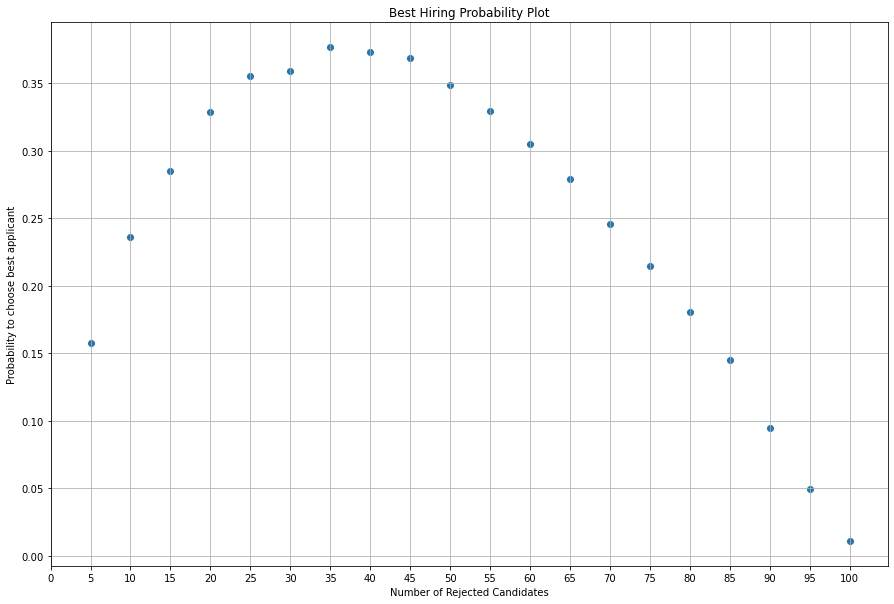

35


In [6]:
n = 100
numberoftests = 10000
BestChoice = Simulationandprob(n,numberoftests)
print(BestChoice)
dimensions=np.array([15,10])
xlabel = 'Number of Rejected Candidates'
title = 'Best Hiring Probability Plot'
Plot(BestChoice,n,dimensions,xlabel,title)
#Now we shall depict the best K value.
BestK = (np.argmax(BestChoice)+1)*5
print(BestK)

#### Part B

In [19]:
def SimulationandprobPartB(n,numberoftests):
    BestChoiceB = []
    for n in range(3,n+1):
        SimulationB=np.array([])
        for i in range(numberoftests):
            SimulationB = np.append(SimulationB,SortandHireCandidates(PreliminaryCandidates(n),int(n/np.exp(1))))
        BestChoiceB.append(np.histogram(SimulationB, bins=n-2)[0][0]/2*numberoftests)
    y=BestChoiceB
    return y

In [22]:
def PlotB(BestChoice,n,dimensions,xlabel,title):
    plt.figure(figsize=(dimensions[0], dimensions[1]))
    PlotN2 = range(3,n+1)
    BestChoice = np.array(BestChoice)
    BestChoice = BestChoice/10**8
    list(BestChoice)
    plt.scatter(PlotN2, BestChoice)
    plt.xticks(np.arange(3, n+1, 1))
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel('Probability to choose best applicant')
    plt.grid(True)
    plt.show()

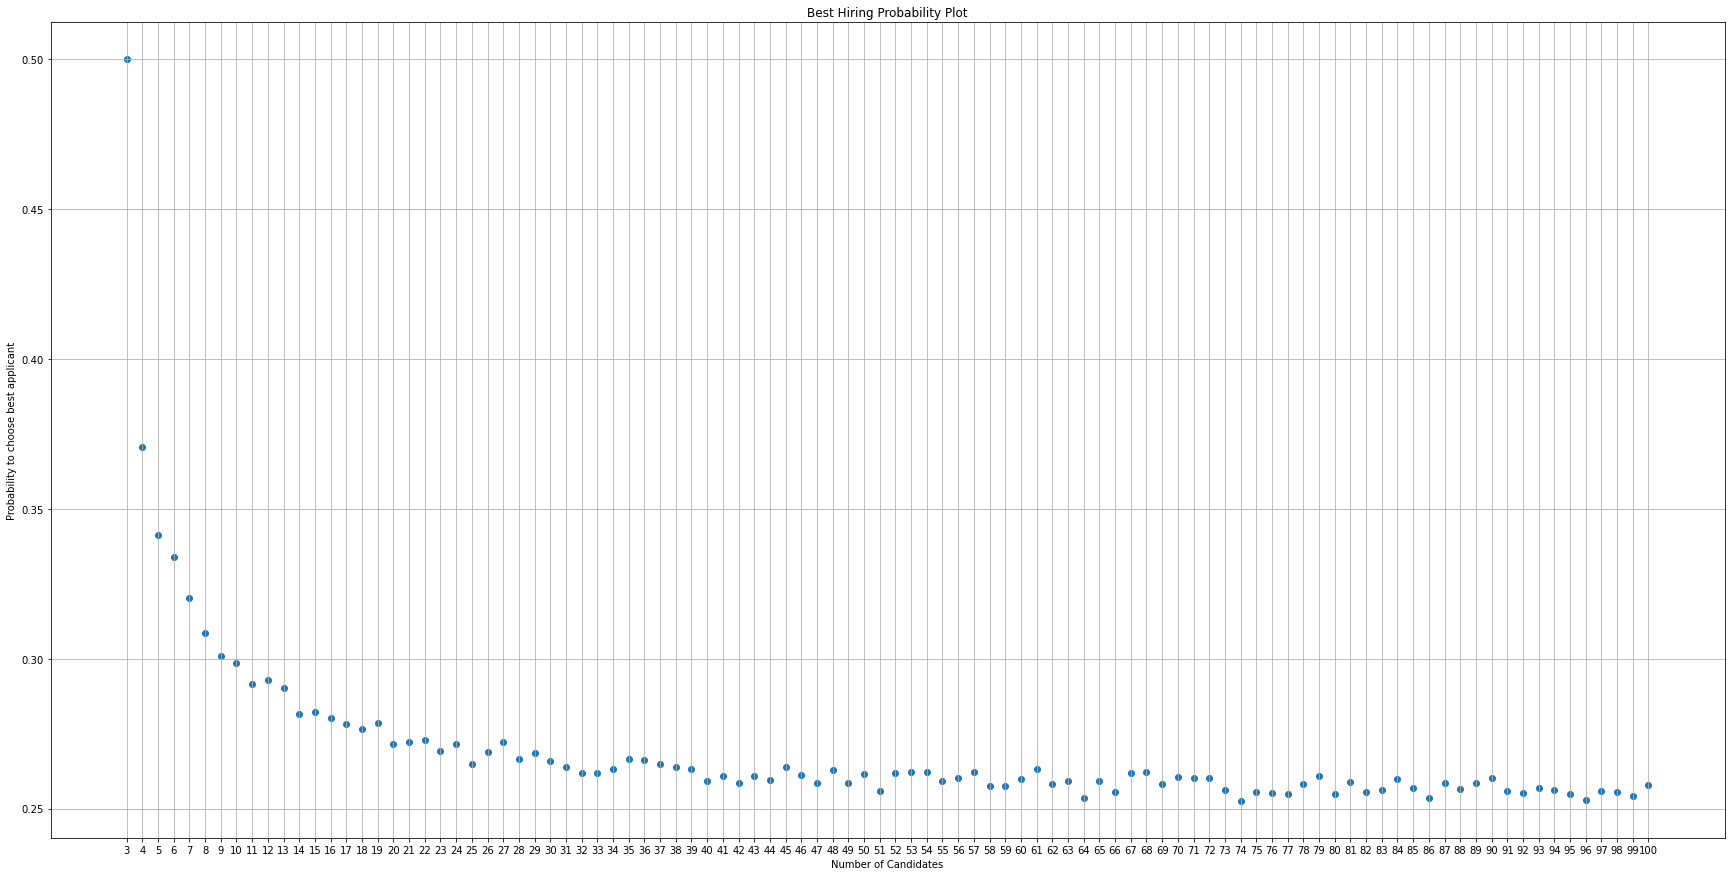

In [23]:
n = 100
numberoftests = 10000
BestChoiceB = SimulationandprobPartB(n,numberoftests)
dimensionsB=np.array([30,15])
xlabelB = 'Number of Candidates'
titleB = 'Best Hiring Probability Plot'
PlotB(BestChoiceB,n,dimensionsB,xlabelB,titleB)

## Part 2

In [10]:
def Distribution(stdNum):
    np.random.seed(1)
    popSize = 1000 

    a1 = stdNum - int(stdNum / 10) * 10
    a2 = int((stdNum - int(stdNum / 100) * 100)/10)
    a3 = int(stdNum / 100)

    
    mu1, sigma1 = a1/2, np.abs(0.5 + 3*a2/10)
    mu2, sigma2 = -1 * a2/2, np.abs(1 + 3*a3/10)
    mu3, sigma3 = a3/2, np.abs(2 + 3*a1/10)


    distributions = [
    {"type": np.random.normal, "kwargs": {"loc": mu1, "scale": sigma1}},
    {"type": np.random.normal, "kwargs": {"loc": mu2, "scale": sigma2}},
    {"type": np.random.normal, "kwargs": {"loc": mu3, "scale": sigma3}},
    ]
    coefficients = np.array([0.4, 0.25, 0.35])
    coefficients /= coefficients.sum()
    popSize = 100000


    num_distr = len(distributions)
    data = np.zeros((popSize, num_distr))
    for idx, distr in enumerate(distributions):
        data[:, idx] = distr["type"](size=(popSize,), **distr["kwargs"])
    random_idx = np.random.choice(np.arange(num_distr), size=(popSize,), p=coefficients)
    Population = data[np.arange(popSize), random_idx]

    return Population

In [11]:
def SamplerAndAVG(Population,n):
    Population=list(Population)
    Sampled = random.sample(Population,n)
    np.array(Sampled)
    Average = np.mean(Sampled)
    return Average

In [12]:
def SamplerAndSTD(Population,n):
    Population=list(Population)
    Sampled = random.sample(Population,n)
    np.array(Sampled)
    STD = np.std(Sampled)
    return STD

In [13]:
Population = Distribution(472)
Population

array([ 5.22329795, -2.16748849,  0.10365453, ...,  2.67423765,
        1.89452006, -0.94364624])

In [14]:
n=10000
s=5000
Avg =[]
for i in range(s):
    Avg.append(SamplerAndAVG(Population,n))

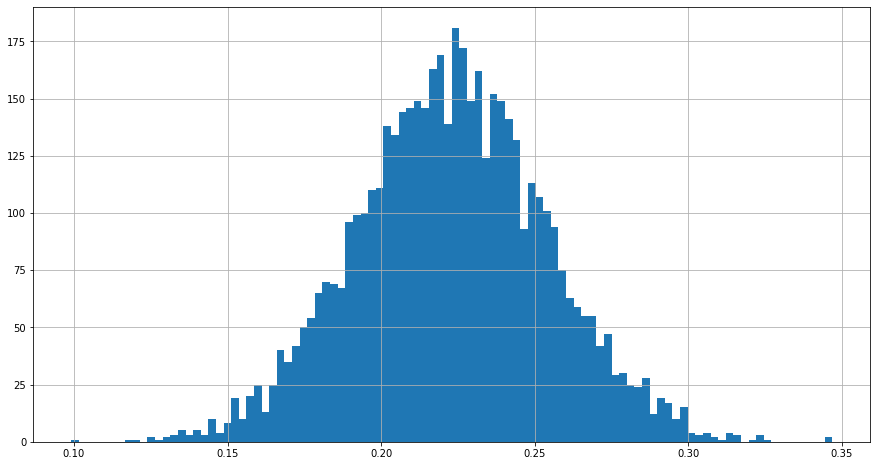

In [25]:
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.set_ylabel('');
ax.set_xlabel('');
ax.hist(Avg,bins=100);
ax.grid()

Now we go on to the wine dataset

In [16]:
data = pd.read_csv('wine.csv')
data

,Class,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
Column12 = list(data['12'])

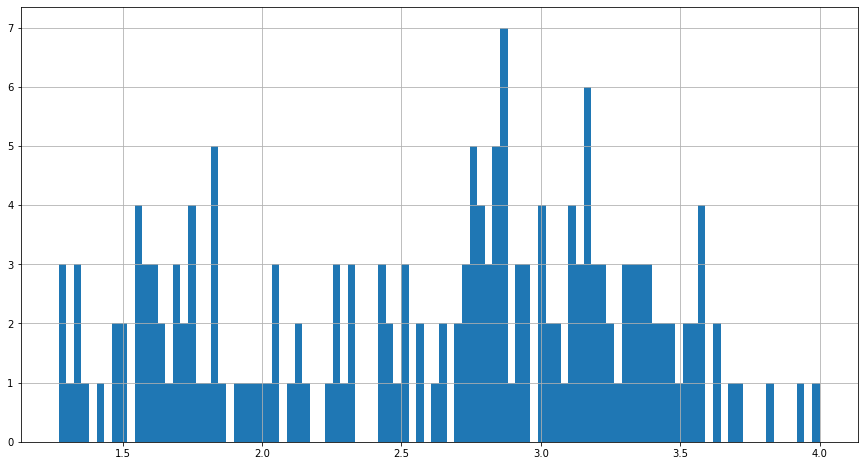

In [18]:
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.set_ylabel('')
ax.set_xlabel('')
ax.hist(Column12,bins=100)
ax.grid()

In [39]:
n1=100
s=5000
AvgWine1 =[]
STDWine1=[]
for i in range(s):
    AvgWine1.append(SamplerAndAVG(Column12,n1))
    STDWine1.append(SamplerAndSTD(Column12,n1))

In [40]:
np.mean(Column12)

2.6116853932584267

In [41]:
np.std(Column12)

0.7079932646716005

In [42]:
np.mean(AvgWine1)

2.61266356

In [43]:
np.mean(STDWine1)

0.7057141581407875

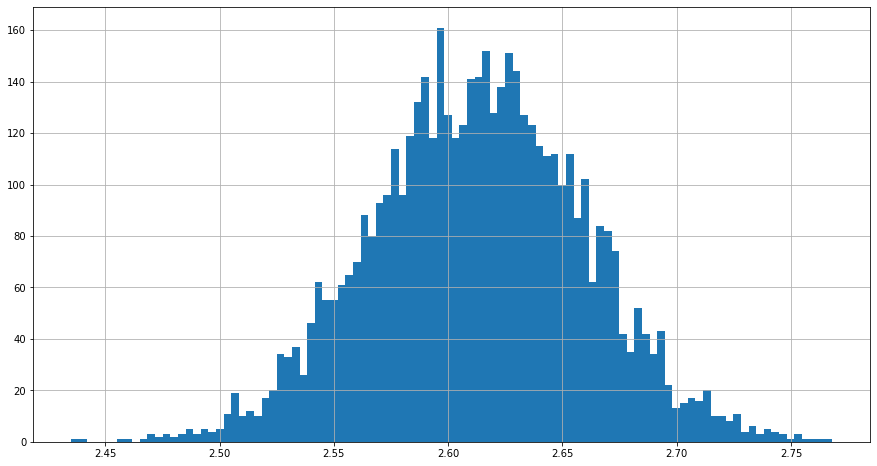

In [44]:
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.set_ylabel('');
ax.set_xlabel('');
ax.hist(AvgWine1,bins=100);
ax.grid()

In [45]:
n2=120
s=5000
AvgWine2 =[]
STDWine2=[]
for i in range(s):
    AvgWine2.append(SamplerAndAVG(Column12,n2))
    STDWine2.append(SamplerAndSTD(Column12,n2))

In [46]:
np.mean(AvgWine2)

2.611849166666667

In [47]:
np.mean(STDWine2)

0.7070276177385078

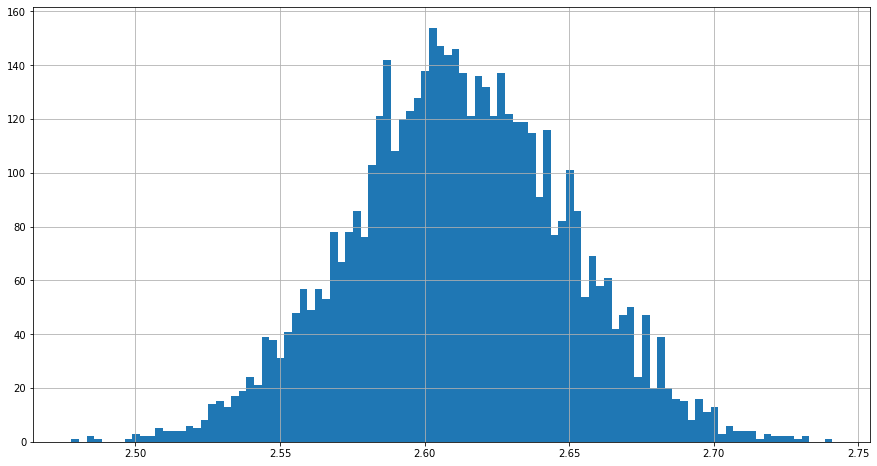

In [48]:
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.set_ylabel('');
ax.set_xlabel('');
ax.hist(AvgWine2,bins=100);
ax.grid()

In [49]:
n3=150
s=5000
AvgWine3 =[]
STDWine3=[]
for i in range(s):
    AvgWine3.append(SamplerAndAVG(Column12,n3))
    STDWine3.append(SamplerAndSTD(Column12,n3))

In [50]:
np.mean(AvgWine3)

2.6122847866666667

In [51]:
np.mean(STDWine3)

0.7074754348148378

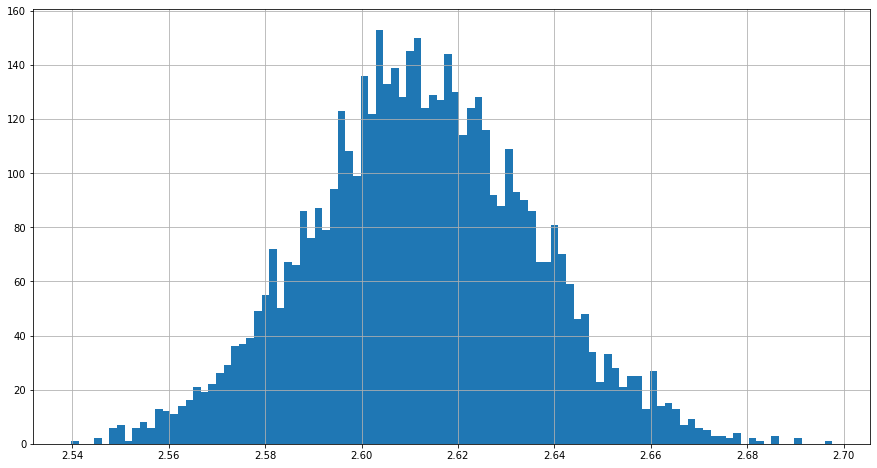

In [52]:
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.set_ylabel('');
ax.set_xlabel('');
ax.hist(AvgWine3,bins=100);
ax.grid()